# Импортирование библиотек

In [1]:
!pip install gradio
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

# Задание входных параметров модели

In [ ]:
'''
# model 1
batch_Size = 32
image_Size = 196
epochs = 5
channels = 3
'''

In [ ]:
'''
# model 2
batch_Size = 32
image_Size = 196
epochs = 15
channels = 3
'''

In [ ]:
'''
# model 3
batch_Size = 32
image_Size = 196
epochs = 11
channels = 3
'''

In [ ]:
'''
# model 4
batch_Size = 64
image_Size = 196
epochs = 11
channels = 3
'''

In [ ]:
'''
# model 5
batch_Size = 128
image_Size = 196
epochs = 11
channels = 3
'''

In [14]:
'''
# model 6
batch_Size = 256
image_Size = 196
epochs = 11
channels = 3
'''

In [3]:

# model 7
batch_Size = 32
image_Size = 196
epochs = 11
channels = 3


# Разделение данных

Датасет расположим в директории гугл-диска

In [2]:
data_dir = "/content/drive/MyDrive/fire_dataset"

In [4]:
#для соотношения тренировочных и тестовых входных данных 70%/30%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 999 files belonging to 2 classes.
Using 700 files for training.


In [5]:
#для соотношения тренировочных и тестовых входных данных 70%/30%
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 999 files belonging to 2 classes.
Using 299 files for validation.


In [15]:
'''
#для соотношения тренировочных и тестовых входных данных 80%/20%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)
  '''

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [16]:
'''
#для соотношения тренировочных и тестовых входных данных 80%/20%
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)
  '''

Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [6]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 196, 196, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
labels = train_ds.class_names
labels

['fire_images', 'non_fire_images']

# Визуализация данных

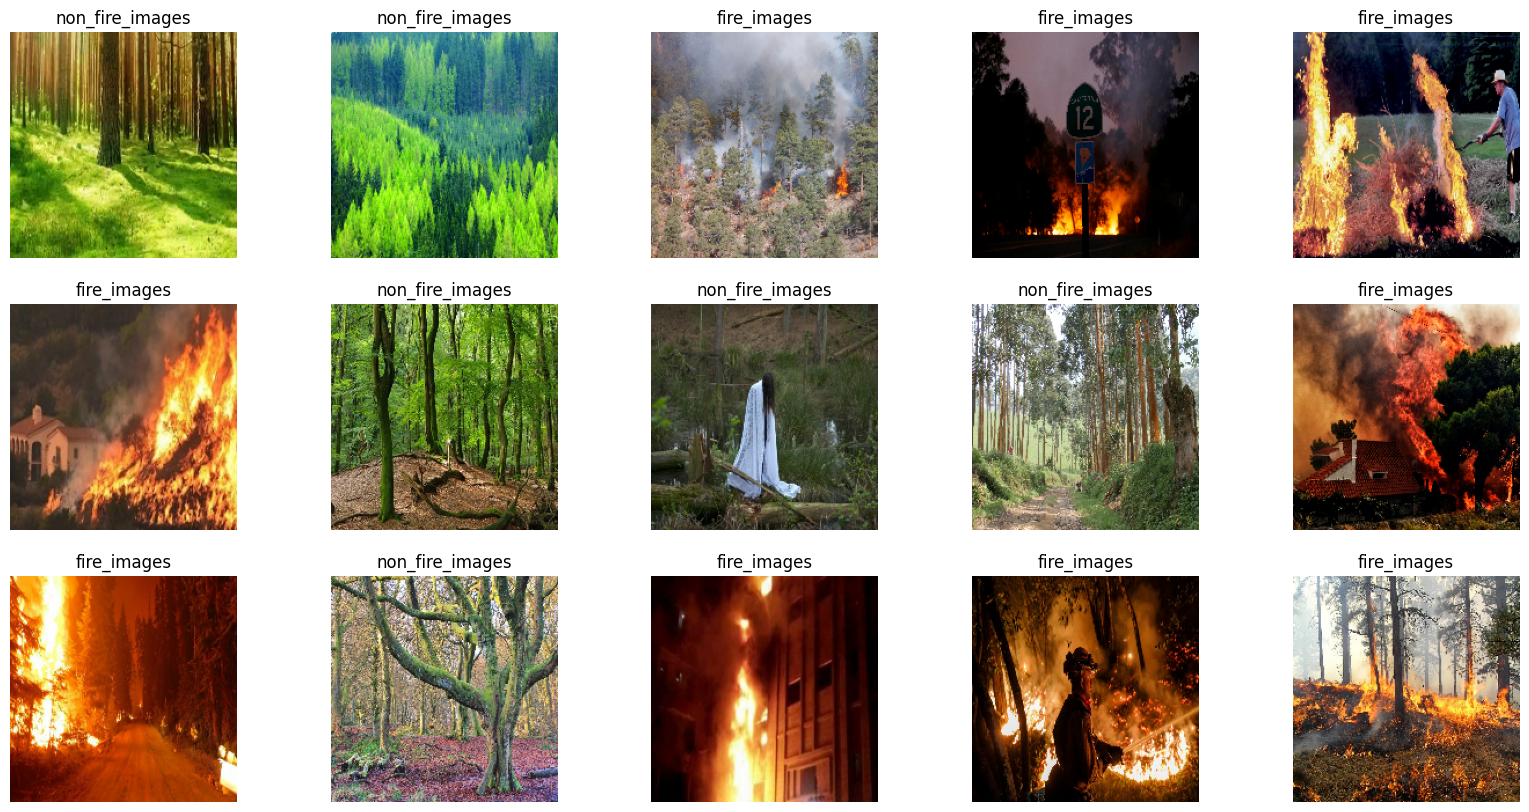

In [8]:
plt.figure(figsize=(20,10))
for imgBatch, labelBatch in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(imgBatch[i].numpy().astype('uint8'))
        plt.title(labels[labelBatch[i]])
        plt.axis("off")
        cls()

# Масштабирование

In [9]:
scaling = tf.keras.Sequential([
    layers.Resizing(196, 196),
    layers.Rescaling(1/255),
])

# Тест 1

Воспользуемся изначально заданными входными параметрами

In [ ]:
model_1 = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model_1.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 222s 8s/step - accuracy: 0.7168 - loss: 0.5546 - val_accuracy: 0.7538 - val_loss: 0.2866
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 192s 8s/step - accuracy: 0.7791 - loss: 0.2917 - val_accuracy: 0.9598 - val_loss: 0.2392
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 7s/step - accuracy: 0.9448 - loss: 0.2515 - val_accuracy: 0.9447 - val_loss: 0.2479
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.9346 - loss: 0.2183 - val_accuracy: 0.9749 - val_loss: 0.1417
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 215s 8s/step - accuracy: 0.9490 - loss: 0.1218 - val_accuracy: 0.9598 - val_loss: 0.1167


Точность на обучающем наборе данных довольно высокая и принимает максимальное значение на 5-й эпохе.

Однако, на тестовом наборе максимум точности был достигнут на предпоследней эпохе.

Потери на обучающем наборе уменьшаются каждую эпоху.

На тестовом наборе также наблюдаем отличную динамику сокращения потерь.

# Визуализация теста 1

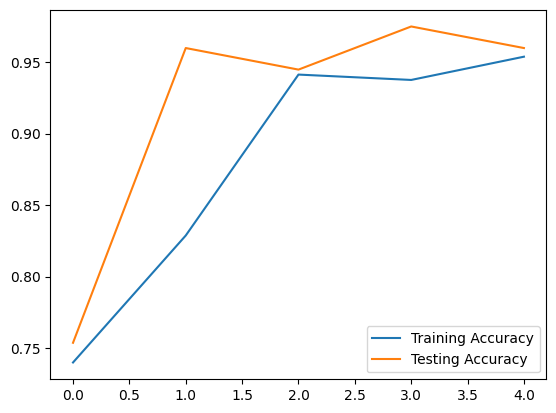

In [ ]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

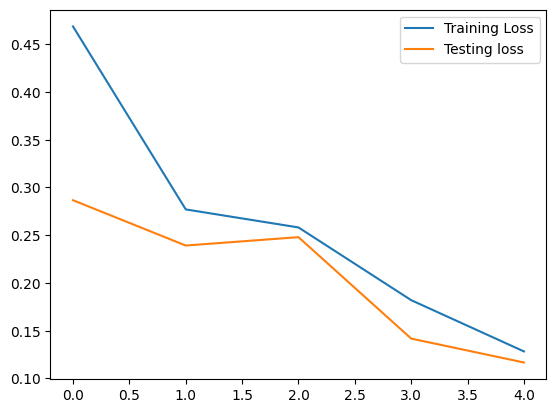

In [ ]:
plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [ ]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model_1.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]

In [ ]:
PredictIMG(val_ds, labels, model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model_1.evaluate(val_ds)
# оценка производительности обученной модели на валидационном наборе данных

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9461 - loss: 0.1472


[0.11670196801424026, 0.9597989916801453]

# Тест 2

Попробуем улучшить модель. Увеличим количество эпох с 5 до 15. Предположим, что увеличение количества эпох улучшит точность модели.

In [ ]:
model_2 = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model_2.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 662ms/step - accuracy: 0.7771 - loss: 0.5009 - val_accuracy: 0.9648 - val_loss: 0.2656
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 631ms/step - accuracy: 0.9344 - loss: 0.2857 - val_accuracy: 0.9497 - val_loss: 0.3162
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 634ms/step - accuracy: 0.9381 - loss: 0.2458 - val_accuracy: 0.9648 - val_loss: 0.1172
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 691ms/step - accuracy: 0.9601 - loss: 0.1079 - val_accuracy: 0.9497 - val_loss: 0.1627
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 621ms/step - accuracy: 0.9519 - loss: 0.1354 - val_accuracy: 0.7990 - val_loss: 0.4381
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 699ms/step - accuracy: 0.7603 - loss: 0.4652 - val_accuracy: 0.9698 - val_loss: 0.2377
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 608ms/step - accuracy: 0.9266 - loss: 0.2137 - val_accuracy: 0.9598 - val_loss: 0.2620
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 730ms/step - accuracy: 0.9514 - loss: 0.2109 - val_accu

1. На обучающем наборе точность росла до 14-й эпохи, достигнув своего максимума. Потери также были минимальны на 14-й эпохе. Далее, показатели ухудшаются, предположительно, из-за переобучения.

2. На 15-й эпохе наблюдаем небольшой прирост val_accuracy в сравнении с первым тестом на 1% с 0.9598 до 0.9698 и небольшое увеличение val_loss с 0.1167 до 0.1256, что практически нивелирует улучшение.

# Визуализация теста 2

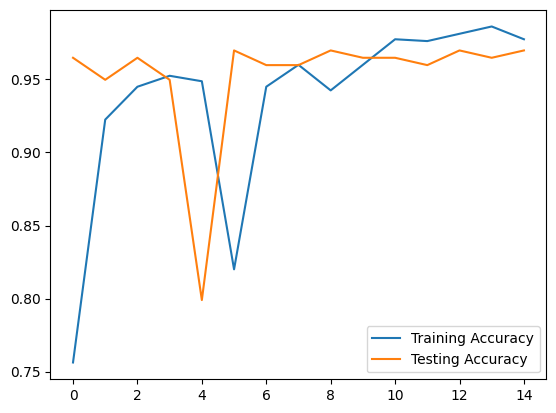

In [ ]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

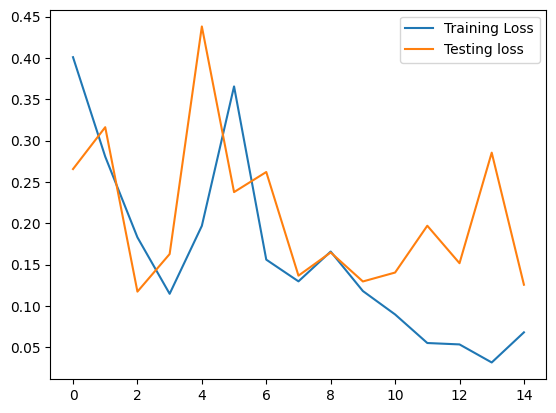

In [ ]:
plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [ ]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model_2.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]

In [ ]:
PredictIMG(val_ds, labels, model_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [ ]:
model_2.evaluate(val_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.9740 - loss: 0.1371


[0.12559664249420166, 0.9698492288589478]

Точность модели выросла на 1%, потери также увеличились на 1%

# Тест 3

Теперь уменьшим количество эпох до 11, так как показатели тренировочного набора были выше при данном значении.

In [ ]:
model_3 = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_3.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model_3.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 288s 11s/step - accuracy: 0.6890 - loss: 0.5525 - val_accuracy: 0.7538 - val_loss: 0.2815
Epoch 2/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 674ms/step - accuracy: 0.7896 - loss: 0.2896 - val_accuracy: 0.9698 - val_loss: 0.2388
Epoch 3/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 618ms/step - accuracy: 0.9434 - loss: 0.2522 - val_accuracy: 0.9548 - val_loss: 0.2246
Epoch 4/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 615ms/step - accuracy: 0.9535 - loss: 0.2294 - val_accuracy: 0.9548 - val_loss: 0.1400
Epoch 5/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 658ms/step - accuracy: 0.9418 - loss: 0.1484 - val_accuracy: 0.9598 - val_loss: 0.1231
Epoch 6/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 709ms/step - accuracy: 0.9463 - loss: 0.1505 - val_accuracy: 0.9497 - val_loss: 0.1705
Epoch 7/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 609ms/step - accuracy: 0.9389 - loss: 0.1638 - val_accuracy: 0.9648 - val_loss: 0.1766
Epoch 8/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 702ms/step - accuracy: 0.9573 - loss: 0.1734 - val_accur

# Визуализация теста 3

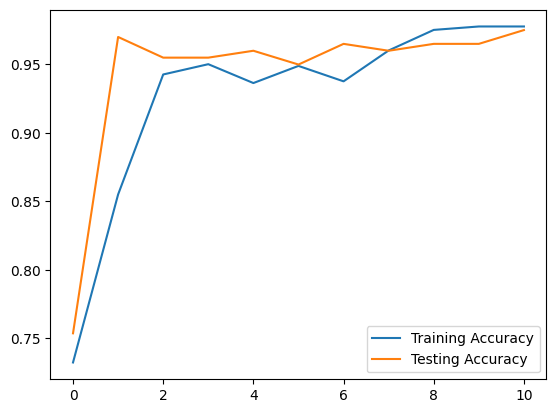

In [ ]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

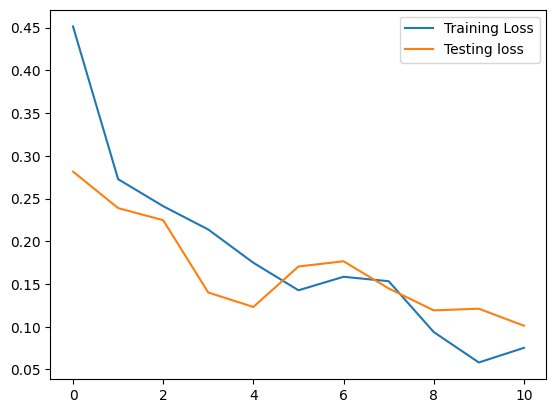

In [ ]:
plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [ ]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model_3.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]

In [ ]:
PredictIMG(val_ds, labels, model_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━

In [ ]:
model_3.evaluate(val_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.9726 - loss: 0.1136


[0.101124607026577, 0.9748743772506714]

По сравнению с предыдущими случаями, наблюдаем улучшение показателей с минимальным количеством потерь (0.101) и наиболее высокой точностью тестового набора данных (0.974).

# Тест 4

Предположим, что увеличение размера батчей даст прирост точности модели.

In [ ]:
model_4 = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_4.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model_4.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 211s 15s/step - accuracy: 0.7620 - loss: 0.5901 - val_accuracy: 0.7538 - val_loss: 0.3812
Epoch 2/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 256s 15s/step - accuracy: 0.7680 - loss: 0.3067 - val_accuracy: 0.7538 - val_loss: 0.4202
Epoch 3/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 15s/step - accuracy: 0.7856 - loss: 0.4222 - val_accuracy: 0.7538 - val_loss: 0.2751
Epoch 4/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 199s 15s/step - accuracy: 0.7723 - loss: 0.2707 - val_accuracy: 0.8894 - val_loss: 0.2669
Epoch 5/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 204s 15s/step - accuracy: 0.9243 - loss: 0.2282 - val_accuracy: 0.9648 - val_loss: 0.2327
Epoch 6/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 193s 15s/step - accuracy: 0.9435 - loss: 0.2330 - val_accuracy: 0.9698 - val_loss: 0.2295
Epoch 7/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 15s/step - accuracy: 0.9267 - loss: 0.2374 - val_accuracy: 0.9548 - val_loss: 0.2496
Epoch 8/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 210s 16s/step - accuracy: 0.9401 - loss: 0.2464 - val_accuracy: 0.

# Визуализация теста 4

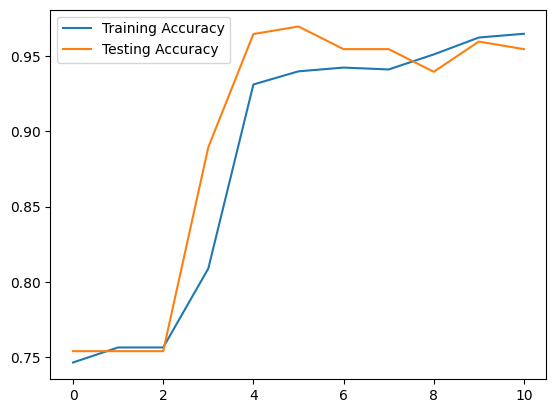

In [ ]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

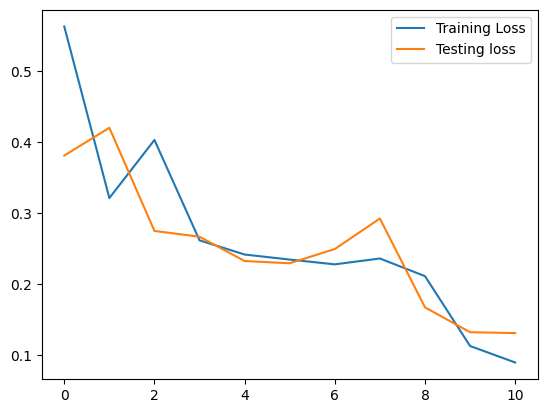

In [ ]:
plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [ ]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model_4.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]

In [ ]:
PredictIMG(val_ds, labels, model_4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1

In [ ]:
model_4.evaluate(val_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9507 - loss: 0.1413


[0.1313096582889557, 0.9547738432884216]

Увеличение размера батчей до 64 привело к самым низким показателям точности и к самому большому количеству потерь.

# Тест 5

Проверим есть ли закономерность между увеличением размера батчей и ухудшением характеристик. Увеличим количество батчей ещё в 2 раза до 128.

In [ ]:
model_5 = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_5.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model_5.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.5852 - loss: 0.6639 Epoch 2/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 243s 26s/step - accuracy: 0.7477 - loss: 0.5740 - val_accuracy: 0.7538 - val_loss: 0.3707
Epoch 3/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 193s 26s/step - accuracy: 0.7642 - loss: 0.3099 - val_accuracy: 0.7538 - val_loss: 0.2715
Epoch 4/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 199s 27s/step - accuracy: 0.7542 - loss: 0.2861 - val_accuracy: 0.9648 - val_loss: 0.2433
Epoch 5/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 193s 26s/step - accuracy: 0.9255 - loss: 0.2647 - val_accuracy: 0.9045 - val_loss: 0.2605
Epoch 6/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 190s 26s/step - accuracy: 0.8742 - loss: 0.2685 - val_accuracy: 0.9648 - val_loss: 0.1930
Epoch 7/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 223s 29s/step - accuracy: 0.9479 - loss: 0.1516 - val_accuracy: 0.9497 - val_loss: 0.1386
Epoch 8/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 242s 26s/step - accuracy: 0.9281 - loss: 0.1515 - val_accuracy: 0.9447 - val_loss: 0.1309
Epoch 9/11
7/7 ━━━━━━━━━━━━━━━━━━━━ 

# Визуализация теста 5

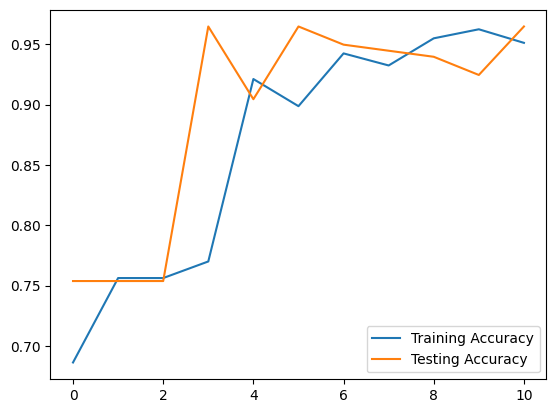

In [ ]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

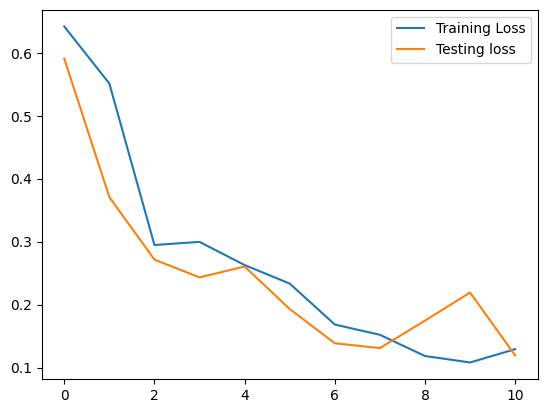

In [ ]:
plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [ ]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model_5.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]

In [ ]:
PredictIMG(val_ds, labels, model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━

In [ ]:
model_5.evaluate(val_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9583 - loss: 0.1303


[0.11930988729000092, 0.9648241400718689]

При увеличении размера батчей ещё в 2 раза, характеристики не ухудшились. Модель показала средний результат.

# Тест 6

Продолжим наблюдать, увеличив размерность батчей до 256. Это в 8 раз больше, чем изначально.

In [21]:
model_6 = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [22]:
model_6.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model_6.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 214s 45s/step - accuracy: 0.5303 - loss: 0.6512 - val_accuracy: 0.7538 - val_loss: 0.5134
Epoch 2/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 257s 43s/step - accuracy: 0.7490 - loss: 0.5203 - val_accuracy: 0.7538 - val_loss: 0.3812
Epoch 3/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 198s 42s/step - accuracy: 0.7585 - loss: 0.3562 - val_accuracy: 0.7538 - val_loss: 0.2909
Epoch 4/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 202s 43s/step - accuracy: 0.7487 - loss: 0.3066 - val_accuracy: 0.7538 - val_loss: 0.2725
Epoch 5/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 213s 45s/step - accuracy: 0.7534 - loss: 0.2760 - val_accuracy: 0.7538 - val_loss: 0.3022
Epoch 6/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 198s 42s/step - accuracy: 0.7594 - loss: 0.2571 - val_accuracy: 0.9698 - val_loss: 0.2431
Epoch 7/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 202s 42s/step - accuracy: 0.9414 - loss: 0.2564 - val_accuracy: 0.8894 - val_loss: 0.2709
Epoch 8/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - accuracy: 0.9035 - loss: 0.2451 Epoch 9/11
4/4 ━━━━━━━━━━━━━━━━━━━━ 

# Визуализация теста 6

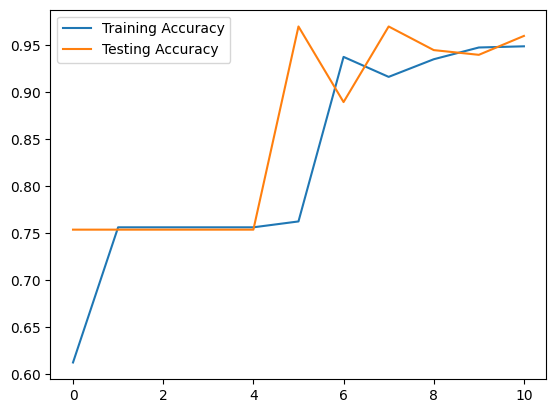

In [23]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

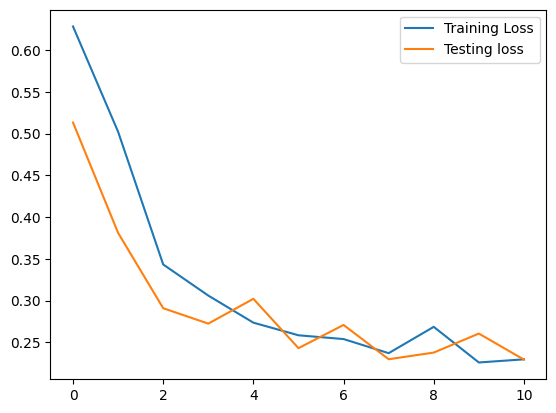

In [24]:
plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [25]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model_6.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]

In [26]:
PredictIMG(val_ds, labels, model_6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━

In [27]:
model_6.evaluate(val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.9598 - loss: 0.2294


[0.2293885201215744, 0.9597989916801453]

При такой размерности батчей точность чуть ниже средней, однако количество потерь примерно в 2 раза больше как на тестовом, так и на тренировочном наборах данных.

# Тест 7

Изменим соотношение тестовых и тренировочных входных данных(фотографий).

При обучении модели бинарной классификации обычно рекомендуется использовать соотношение около 70-80% тренировочных фотографий и 20-30% тестовых фотографий для эффективного обучения модели.

Соответственно, тестовые изменим с 20% до 30% и тренировочные с 80% до 70%.

В качестве входных данных возьмем те же, что и в 3-ей модели, так как они показали лучший результат.

In [10]:
model_7 = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model_7.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model_7.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 171s 7s/step - accuracy: 0.7531 - loss: 0.6150 - val_accuracy: 0.7559 - val_loss: 0.3098
Epoch 2/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 875ms/step - accuracy: 0.7781 - loss: 0.2940 - val_accuracy: 0.9398 - val_loss: 0.2505
Epoch 3/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 953ms/step - accuracy: 0.9368 - loss: 0.2201 - val_accuracy: 0.9064 - val_loss: 0.2383
Epoch 4/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 950ms/step - accuracy: 0.9378 - loss: 0.1567 - val_accuracy: 0.9164 - val_loss: 0.2228
Epoch 5/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 762ms/step - accuracy: 0.9701 - loss: 0.1199 - val_accuracy: 0.9365 - val_loss: 0.1373
Epoch 6/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 741ms/step - accuracy: 0.9642 - loss: 0.1356 - val_accuracy: 0.9666 - val_loss: 0.1607
Epoch 7/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 733ms/step - accuracy: 0.9367 - loss: 0.1780 - val_accuracy: 0.9666 - val_loss: 0.1214
Epoch 8/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 774ms/step - accuracy: 0.9443 - loss: 0.1213 - val_accura

# Визуализация теста 7

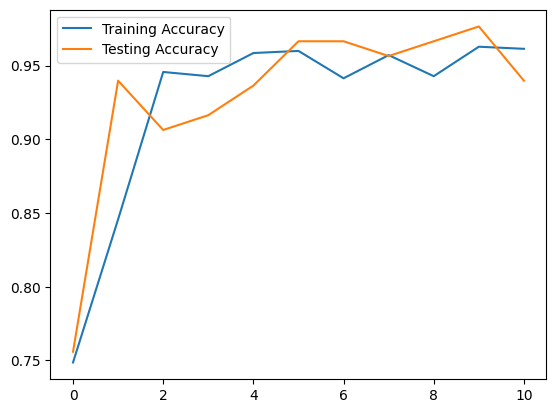

In [12]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

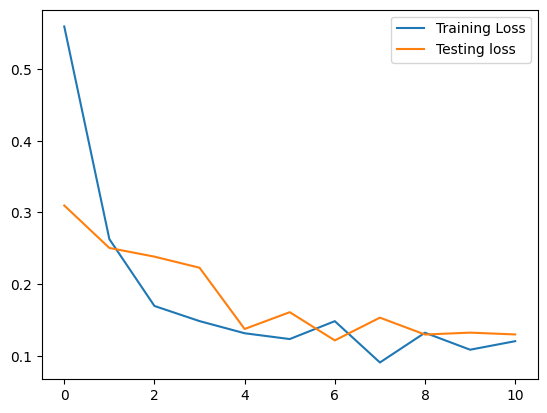

In [14]:
plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [15]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model_7.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]

In [16]:
PredictIMG(val_ds, labels, model_7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━

In [17]:
model_7.evaluate(val_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.9454 - loss: 0.1280


[0.12966260313987732, 0.9397993087768555]

После изменения соотношения тестовых и тренировочных входных данных  показатели val_accuracy и val_loss ухудшились на ≈ 3%.

Значит, соотношение тренировочных и тестовых входных данных 80%/20% - является более подходящим.

# Архитектура нейронной сети

In [28]:
model_7.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 196, 196, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 194, 194, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 97, 97, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 95, 95, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 93, 93, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 44, 44, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 20, 20, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 18, 18, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,334,405 (5.09 MB)

 Trainable params: 444,801 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 889,604 (3.39 MB)

# Вывод

При довольно высоких изначальных показателях, точность модели удалось улучшить на ≈ 3% до 0.974, потери удалось сократить на ≈ 8% до 0.101, увеличив количество эпох до 11-ти. Увеличение размера батчей и изменение процентного соотношения тренировочных и тестовых входных данных не принесло улучшения результатов. Функция потерь и оптимайзер подобраны для модели классификации. Обучение модели стабильно, без резких колебаний в качестве или потерях. Постепенное улучшение показателей как на обучающем, так и на тестовом наборе свидетельствует о качественном процессе обучения.